In [1]:
import os
import struct

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def read_input_beam(filename, skiprows, columns):
    """
    Reads a particle distribution file with columns
    """
    df = pd.read_csv(filename, sep='\s+', skiprows=skiprows, header=None, names=columns, engine='python')

    return df

## Read coords.out file

In [3]:
base_dir = 'input_beam'
filename = base_dir + '/' + 'coord.out'
columns = ["Nseed", "iq", "dt_nsec", "dW_MeV_per_u", "x_cm", "xp_mrad", "y_cm", "yp_mrad"]

df_particles = read_input_beam(filename, skiprows=1, columns=columns)
print(df_particles)

x = df_particles["x_cm"] * 10   # cm to mm
xp = df_particles["xp_mrad"]
y = df_particles["y_cm"] * 10   # cm to mm
yp = df_particles["yp_mrad"]
dt = df_particles["dt_nsec"]
dW = df_particles["dW_MeV_per_u"]

       Nseed  iq  dt_nsec  dW_MeV_per_u      x_cm   xp_mrad      y_cm  yp_mrad
0          0   1   0.0000 -3.543100e-10  0.000000  0.000000  0.000000  0.00000
1          0   1   0.3688 -1.729900e-06  0.364630  0.009006 -0.548030  3.67950
2          0   1  -4.1981 -1.226300e-06 -0.049758  3.552800 -0.843420  2.40290
3          0   1  -6.1599 -2.726600e-06 -0.014469  3.064900 -0.452100  3.18300
4          0   1  -5.7163 -2.263800e-07 -0.569520  3.185900  0.089529 -2.47710
...      ...  ..      ...           ...       ...       ...       ...      ...
9996       0   1   9.7589  1.559600e-06  0.323200 -2.690800  0.283230  1.66500
9997       0   1   4.0432 -1.363000e-10 -0.431440  3.796700  0.105720  0.21555
9998       0   1  -2.9019 -1.613500e-06  0.323680 -5.662900  0.465420 -3.35200
9999       0   1   5.5605  3.090700e-06 -0.073726  3.854000 -0.329030 -4.44810
10000      0   1   2.3026  4.462700e-06  0.258360 -1.822900 -0.044803  3.79500

[10001 rows x 8 columns]


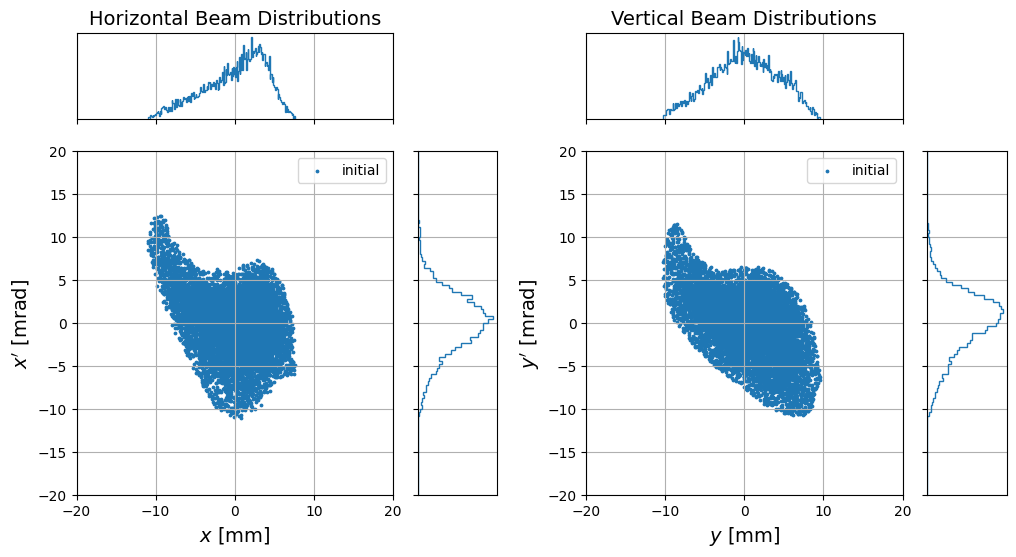

In [4]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 5, width_ratios=[4, 1, 0.5, 4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)

# Vertical phase space
ax_histx2 = fig.add_subplot(gs[0, 3], sharex=None)
ax_histy2 = fig.add_subplot(gs[1, 4], sharey=None)
ax_main_y = fig.add_subplot(gs[1, 3], sharex=ax_histx2, sharey=ax_histy2)

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_x.scatter(x, xp, s=3, label='initial')
ax_main_x.set_xlabel(r'$x$ [mm]', fontsize=14)
ax_main_x.set_ylabel(r"$x'$ [mrad]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)
ax_main_x.legend(loc='best', fontsize=10)

# Horizontal top projection
ax_histx.set_title('Horizontal Beam Distributions', fontsize=14)
ax_histx.hist(x, bins=nbins, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(xp, bins=100, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
ax_histy.set_ylim(ax_main_x.get_ylim())
ax_histy.tick_params(labelleft=False)  # show y-axis labels

# -- Vertical main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_y.scatter(y, yp, s=3, label='initial')
ax_main_y.set_xlabel(r'$y$ [mm]', fontsize=14)
ax_main_y.set_ylabel(r"$y'$ [mrad]", fontsize=14)
ax_main_y.set_xlim([xmin, xmax])
ax_main_y.set_ylim([ymin, ymax])
ax_main_y.grid(True)
ax_main_y.legend(loc='best', fontsize=10)

# Vertical top projection
ax_histx2.set_title('Vertical Beam Distributions', fontsize=14)
ax_histx2.hist(y, bins=nbins, histtype='step')
ax_histx2.grid(True)
ax_histx2.set_yticks([])
ax_histx2.tick_params(labelbottom=False)

# Vertical right projection
ax_histy2.hist(yp, bins=100, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy2.grid(True)
ax_histy2.set_xticks([])
#ax_histy2.set_ylim(ax_main_y.get_ylim())
ax_histy2.tick_params(labelleft=False)

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

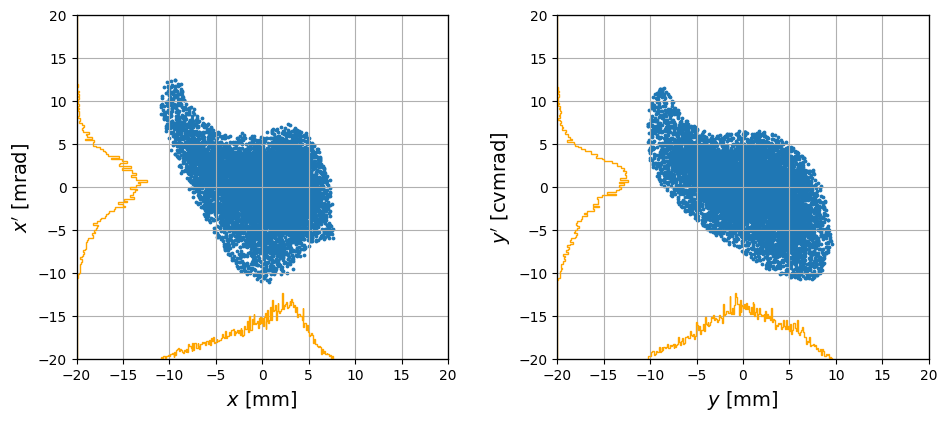

In [5]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(12, 6))
# Adjust height_ratios and wspace.  We'll remove the extra space for the projection plots.
gs = gridspec.GridSpec(2, 4, width_ratios=[4, 0.5, 4, 0.5], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_main_x = fig.add_subplot(gs[1, 0])
ax_histx = ax_main_x.twinx()
ax_histy = ax_main_x.twiny()

# Vertical phase space
ax_main_y = fig.add_subplot(gs[1, 2])
ax_histx2 = ax_main_y.twinx()
ax_histy2 = ax_main_y.twiny()

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_x.scatter(x, xp, s=3, label='initial')
ax_main_x.set_xlabel(r'$x$ [mm]', fontsize=14)
ax_main_x.set_ylabel(r"$x'$ [mrad]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.hist(x, bins=nbins, histtype='step', color='orange')
ax_histx.grid(False) # Turn off grid for the projection
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)
ax_histx.set_xlim(xmin, xmax)
ax_histx.set_ylim(0, ax_histx.get_ylim()[1]*5)

# Horizontal right projection
ax_histy.hist(xp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step', color='orange')
ax_histy.grid(False)
ax_histy.set_xticks([])
ax_histy.set_ylim(ymin, ymax)
ax_histy.tick_params(labelleft=False)
ax_histy.set_xlim(0, ax_histy.get_xlim()[1]*5)

# -- Vertical main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_y.scatter(y, yp, s=3, label='initial')
ax_main_y.set_xlabel(r'$y$ [mm]', fontsize=14)
ax_main_y.set_ylabel(r"$y'$ [cvmrad]", fontsize=14)
ax_main_y.set_xlim([xmin, xmax])
ax_main_y.set_ylim([ymin, ymax])
ax_main_y.grid(True)

# Vertical top projection
ax_histx2.hist(y, bins=nbins, histtype='step', color='orange')
ax_histx2.grid(False)
ax_histx2.set_yticks([])
ax_histx2.tick_params(labelbottom=False)
ax_histx2.set_xlim(xmin, xmax)
ax_histx2.set_ylim(0, ax_histx2.get_ylim()[1]*5)

# Vertical right projection
ax_histy2.hist(yp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step', color='orange')
ax_histy2.grid(False)
ax_histy2.set_xticks([])
ax_histy2.set_ylim(ymin, ymax)
ax_histy2.tick_params(labelleft=False)
ax_histy2.set_xlim(0, ax_histy2.get_xlim()[1]*5)

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

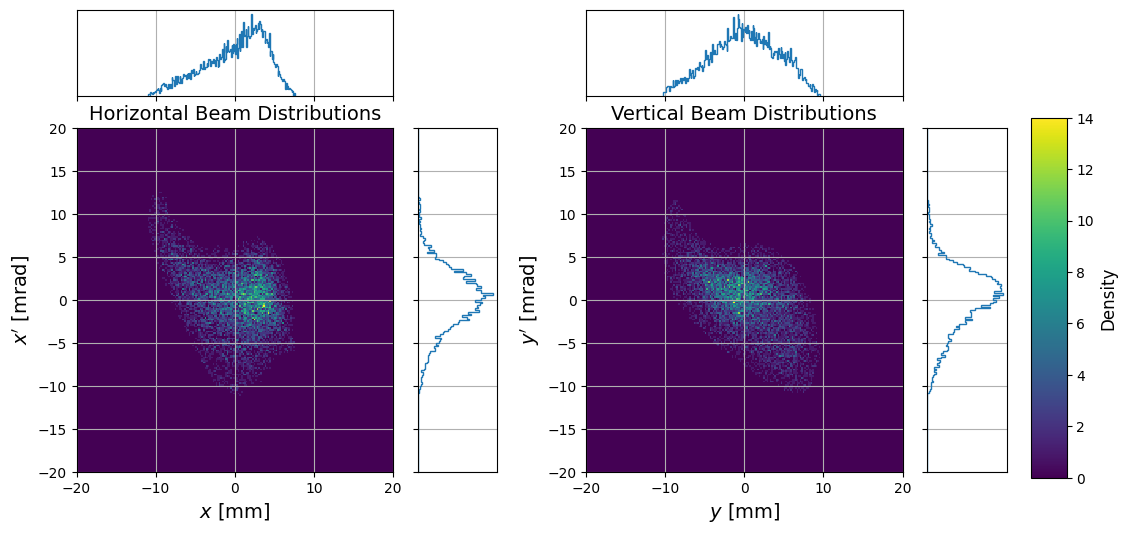

In [6]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(12, 6))
# Adjust height_ratios and wspace
gs = gridspec.GridSpec(2, 5, width_ratios=[4, 1, 0.5, 4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)

# Vertical phase space
ax_histx2 = fig.add_subplot(gs[0, 3], sharex=None)
ax_histy2 = fig.add_subplot(gs[1, 4], sharey=None)
ax_main_y = fig.add_subplot(gs[1, 3], sharex=ax_histx2, sharey=ax_histy2)

# Common colorbar axis
cax = fig.add_axes([0.92, 0.10, 0.03, 0.6])  # [left, bottom, width, height]

# -- Horizontal main density
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_x.set_title('Horizontal Beam Distributions', fontsize=14)
# Use hist2d for density plot
h_x = ax_main_x.hist2d(x, xp, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])
ax_main_x.set_xlabel(r'$x$ [mm]', fontsize=14)
ax_main_x.set_ylabel(r"$x'$ [mrad]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.hist(x, bins=nbins, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)
#ax_histx.set_xlim(xmin, xmax)

# Horizontal right projection
ax_histy.hist(xp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
#ax_histy.set_ylim(ymin, ymax)
ax_histy.tick_params(labelleft=False)

# -- Vertical main density
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_y.set_title('Vertical Beam Distributions', fontsize=14)
# Use hist2d for density plot
h_y = ax_main_y.hist2d(y, yp, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])
ax_main_y.set_xlabel(r'$y$ [mm]', fontsize=14)
ax_main_y.set_ylabel(r"$y'$ [mrad]", fontsize=14)
ax_main_y.set_xlim([xmin, xmax])
ax_main_y.set_ylim([ymin, ymax])
ax_main_y.grid(True)

# Vertical top projection
ax_histx2.hist(y, bins=nbins, histtype='step')
ax_histx2.grid(True)
ax_histx2.set_yticks([])
ax_histx2.tick_params(labelbottom=False)
#ax_histx2.set_xlim(xmin, xmax)

# Vertical right projection
ax_histy2.hist(yp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy2.grid(True)
ax_histy2.set_xticks([])
#ax_histy2.set_ylim(ymin, ymax)
ax_histy2.tick_params(labelleft=False)

# Add a common colorbar
fig.colorbar(h_y[3], cax=cax)
cax.set_ylabel('Density', fontsize=12)

# fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

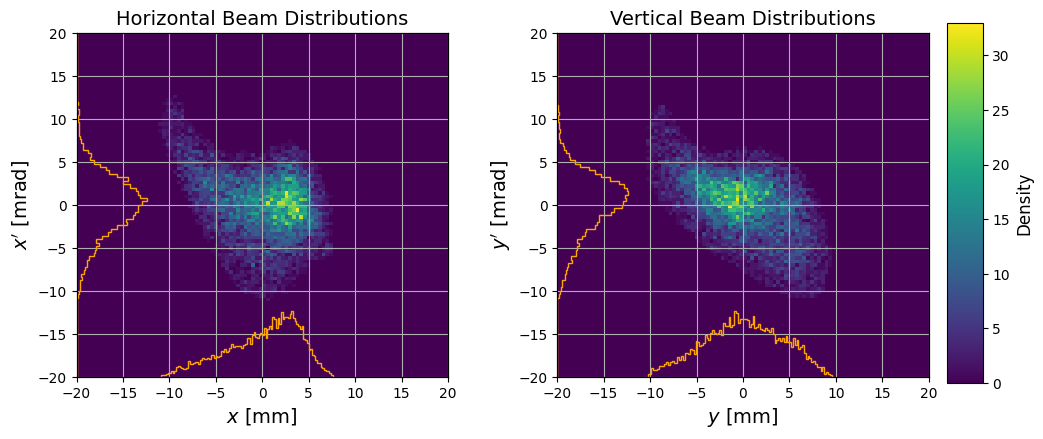

In [7]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(12, 6))
# Adjust height_ratios and wspace.  We'll remove the extra space for the projection plots.
gs = gridspec.GridSpec(2, 4, width_ratios=[4, 0.5, 4, 0.5], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 100

# Horizontal phase space
ax_main_x = fig.add_subplot(gs[1, 0])  # , sharex=ax_histx) # Removed sharex
ax_histx = ax_main_x.twinx()
ax_histy = ax_main_x.twiny()

# Vertical phase space
ax_main_y = fig.add_subplot(gs[1, 2])  # , sharex=ax_histx2) # Removed sharex
ax_histx2 = ax_main_y.twinx()
ax_histy2 = ax_main_y.twiny()

# Common colorbar axis
cax = fig.add_axes([0.85, 0.1, 0.03, 0.6])  # [left, bottom, width, height]

# -- Horizontal main density
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_x.set_title('Horizontal Beam Distributions', fontsize=14)
# Use hist2d for density plot
h_x = ax_main_x.hist2d(x, xp, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])
ax_main_x.set_xlabel(r'$x$ [mm]', fontsize=14)
ax_main_x.set_ylabel(r"$x'$ [mrad]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)
ax_main_x.set_frame_on(False) # turn off the frame for the main plot, so the projections are visible

# Horizontal top projection
ax_histx.hist(x, bins=nbins, histtype='step', color='orange')
ax_histx.grid(False) # Turn off grid for the projection
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)
ax_histx.set_xlim(xmin, xmax)
ax_histx.set_ylim(0, ax_histx.get_ylim()[1]*5)

# Horizontal right projection
ax_histy.hist(xp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step', color='orange')
ax_histy.grid(False)
ax_histy.set_xticks([])
ax_histy.set_ylim(ymin, ymax)
ax_histy.tick_params(labelleft=False)
ax_histy.set_xlim(0, ax_histy.get_xlim()[1]*5)

# -- Vertical main density
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_y.set_title('Vertical Beam Distributions', fontsize=14)
# Use hist2d for density plot
h_y = ax_main_y.hist2d(y, yp, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])
ax_main_y.set_xlabel(r'$y$ [mm]', fontsize=14)
ax_main_y.set_ylabel(r"$y'$ [mrad]", fontsize=14)
ax_main_y.set_xlim([xmin, xmax])
ax_main_y.set_ylim([ymin, ymax])
ax_main_y.grid(True)
ax_main_y.set_frame_on(False)

# Vertical top projection
ax_histx2.hist(y, bins=nbins, histtype='step', color='orange')
ax_histx2.grid(False)
ax_histx2.set_yticks([])
ax_histx2.tick_params(labelbottom=False)
ax_histx2.set_xlim(xmin, xmax)
ax_histx2.set_ylim(0, ax_histx2.get_ylim()[1]*5)

# Vertical right projection
ax_histy2.hist(yp, bins=nbins, range=(ymin, ymax), orientation='horizontal', histtype='step', color='orange')
ax_histy2.grid(False)
ax_histy2.set_xticks([])
ax_histy2.set_ylim(ymin, ymax)
ax_histy2.tick_params(labelleft=False)
ax_histy2.set_xlim(0, ax_histy2.get_xlim()[1]*5)

# Add a common colorbar
fig.colorbar(h_y[3], cax=cax)
cax.set_ylabel('Density', fontsize=12)

# fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

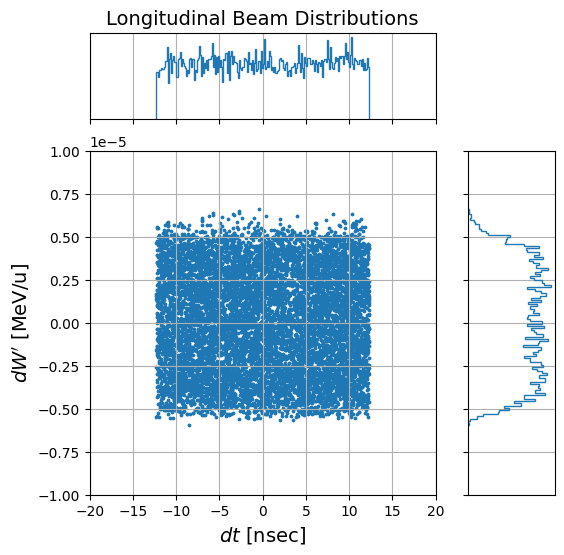

In [8]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -10e-6, 10e-6

ax_main_x.scatter(dt, dW, s=3, label='initial')
ax_main_x.set_xlabel(r'$dt$ [nsec]', fontsize=14)
ax_main_x.set_ylabel(r"$dW'$ [MeV/u]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.set_title('Longitudinal Beam Distributions', fontsize=14)
ax_histx.hist(dt, bins=nbins, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(dW, bins=100, orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
#ax_histy.set_ylim(ax_main_x.get_ylim())
ax_histy.tick_params(labelleft=False)  # show y-axis labels

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

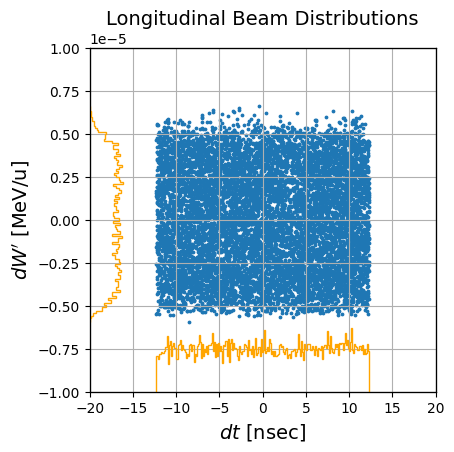

In [9]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_main_x = fig.add_subplot(gs[1, 0])
ax_histx = ax_main_x.twinx()
ax_histy = ax_main_x.twiny()

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -10e-6, 10e-6

ax_main_x.scatter(dt, dW, s=3, label='initial')
ax_main_x.set_xlabel(r'$dt$ [nsec]', fontsize=14)
ax_main_x.set_ylabel(r"$dW'$ [MeV/u]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.set_title('Longitudinal Beam Distributions', fontsize=14)
ax_histx.hist(dt, bins=nbins, histtype='step', color='orange')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.set_ylim(0, ax_histx.get_xlim()[1]*20)
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(dW, bins=100, orientation='horizontal', histtype='step', color='orange')
ax_histy.grid(True)
ax_histy.set_xticks([])
ax_histy.set_xlim(0, ax_histy.get_xlim()[1]*10)
ax_histy.tick_params(labelleft=False)  # show y-axis labels

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

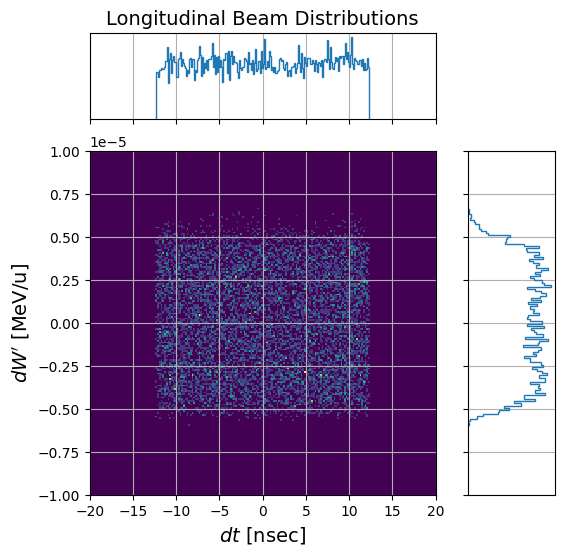

In [10]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -10e-6, 10e-6

#ax_main_x.scatter(dt, dW, s=3, label='initial')
h_x = ax_main_x.hist2d(dt, dW, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])

ax_main_x.set_xlabel(r'$dt$ [nsec]', fontsize=14)
ax_main_x.set_ylabel(r"$dW'$ [MeV/u]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.set_title('Longitudinal Beam Distributions', fontsize=14)
ax_histx.hist(dt, bins=nbins, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(dW, bins=100, orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
#ax_histy.set_ylim(ax_main_x.get_ylim())
ax_histy.tick_params(labelleft=False)  # show y-axis labels

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

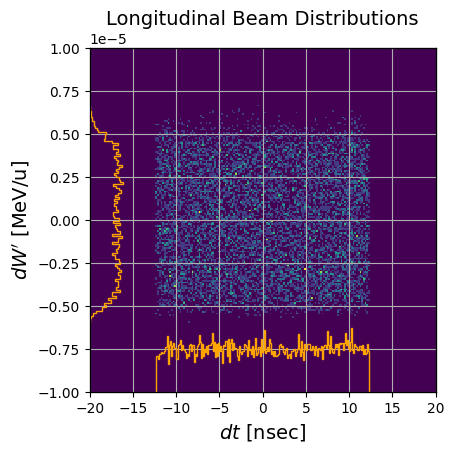

In [11]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_main_x = fig.add_subplot(gs[1, 0])  # , sharex=ax_histx) # Removed sharex
ax_histx = ax_main_x.twinx()
ax_histy = ax_main_x.twiny()

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -10e-6, 10e-6

#ax_main_x.scatter(dt, dW, s=3, label='initial')
h_x = ax_main_x.hist2d(dt, dW, bins=nbins, cmap='viridis', range=[[xmin, xmax], [ymin, ymax]])

ax_main_x.set_xlabel(r'$dt$ [nsec]', fontsize=14)
ax_main_x.set_ylabel(r"$dW'$ [MeV/u]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.set_title('Longitudinal Beam Distributions', fontsize=14)
ax_histx.hist(dt, bins=nbins, histtype='step', color='orange')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.set_ylim(0, ax_histx.get_xlim()[1]*20)
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(dW, bins=100, orientation='horizontal', histtype='step', color='orange')
ax_histy.grid(True)
ax_histy.set_xticks([])
ax_histy.set_xlim(0, ax_histy.get_xlim()[1]*10)
ax_histy.tick_params(labelleft=False)  # show y-axis labels

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

## Read read_dis.out file

In [12]:
def read_particle_file_clean(filename):
    """
    Reads a particle distribution file with trailing dummy columns.
    Assigns columns: x, xp, y, yp, t, dW
    Skips the first 3 header lines.
    """
    # Read the file, skipping the first 3 lines
    df = pd.read_csv(filename, sep='\s+', skiprows=3, header=None, engine='python')

    # Remove the trailing column if 7 columns exist (6 + dummy 0)
    if df.shape[1] == 7:
        df = df.iloc[:, :-1]  # drop the last column

    # Rename columns
    df.columns = ["x", "xp", "y", "yp", "t", "dW"]

    return df

In [13]:
base_dir = 'input_beam'
filename = base_dir + '/' + 'read_dis.out'
columns = ["x_cm", "xp_rad", "y_cm", "yp_rad", "dt_nsec", "dW_MeV_per_u", 'pid']

df_particles2 = read_input_beam(filename, skiprows=3, columns=columns)
print(df_particles2)

x2 = df_particles2["x_cm"] * 10     # cm to mm
xp2 = df_particles2["xp_rad"] * 1e3  # rad to mrad
y2 = df_particles2["y_cm"] * 10     # cm to mm
yp2 = df_particles2["yp_rad"] * 1e3  # rad to mrad
dt2 = df_particles2["dt_nsec"]
dW2 = df_particles2["dW_MeV_per_u"]

           x_cm    xp_rad      y_cm    yp_rad   dt_nsec  dW_MeV_per_u  pid
0      0.000000  0.000000  0.000000  0.000000  0.000000      0.004634    0
1      0.364632  0.000009 -0.548031  0.003680  0.094138      0.004633    0
2     -0.049758  0.003553 -0.843420  0.002403 -1.071587      0.004634    0
3     -0.014469  0.003065 -0.452101  0.003183 -1.572340      0.004633    0
4     -0.569517  0.003186  0.089529 -0.002477 -1.459115      0.004634    0
...         ...       ...       ...       ...       ...           ...  ...
9996   0.323197 -0.002691  0.283228  0.001665  2.490996      0.004634    0
9997  -0.431435  0.003797  0.105718  0.000216  1.032044      0.004634    0
9998   0.323683 -0.005663  0.465418 -0.003352 -0.740721      0.004633    0
9999  -0.073726  0.003854 -0.329034 -0.004448  1.419354      0.004635    0
10000  0.258360 -0.001823 -0.044803  0.003795  0.587748      0.004635    0

[10001 rows x 7 columns]


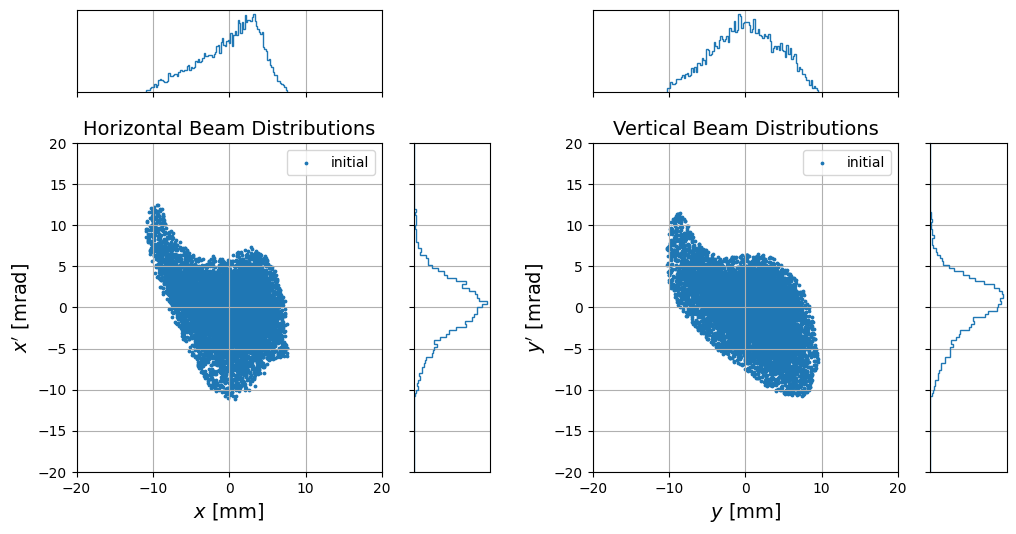

In [14]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 5, width_ratios=[4, 1, 0.5, 4, 1], height_ratios=[1, 4], hspace=0.25, wspace=0.2)

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx)

# Vertical phase space
ax_histx2 = fig.add_subplot(gs[0, 3], sharex=None)
ax_histy2 = fig.add_subplot(gs[1, 4], sharey=None)
ax_main_y = fig.add_subplot(gs[1, 3], sharex=ax_histx2)

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_x.set_title('Horizontal Beam Distributions', fontsize=14)
ax_main_x.scatter(x2, xp2, s=3, label='initial')
ax_main_x.set_xlabel(r'$x$ [mm]', fontsize=14)
ax_main_x.set_ylabel(r"$x'$ [mrad]", fontsize=14)
ax_main_x.set_xlim([xmin, xmax])
ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)
ax_main_x.legend(loc='best', fontsize=10)

# Horizontal top projection
ax_histx.hist(x, bins=100, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(xp, bins=100, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
ax_histy.set_ylim(ax_main_x.get_ylim())
ax_histy.tick_params(labelleft=False)  # show y-axis labels

# -- Vertical main scatter
xmin, xmax = -20, 20
ymin, ymax = -20, 20

ax_main_y.set_title('Vertical Beam Distributions', fontsize=14)
ax_main_y.scatter(y2, yp2, s=3, label='initial')
ax_main_y.set_xlabel(r'$y$ [mm]', fontsize=14)
ax_main_y.set_ylabel(r"$y'$ [mrad]", fontsize=14)
ax_main_y.set_xlim([xmin, xmax])
ax_main_y.set_ylim([ymin, ymax])
ax_main_y.grid(True)
ax_main_y.legend(loc='best', fontsize=10)

# Vertical top projection
ax_histx2.hist(y, bins=100, histtype='step')
ax_histx2.grid(True)
ax_histx2.set_yticks([])
ax_histx2.tick_params(labelbottom=False)

# Vertical right projection
ax_histy2.hist(yp, bins=100, range=(ymin, ymax), orientation='horizontal', histtype='step')
ax_histy2.grid(True)
ax_histy2.set_xticks([])
ax_histy2.set_ylim(ax_main_y.get_ylim())
ax_histy2.tick_params(labelleft=False)

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()

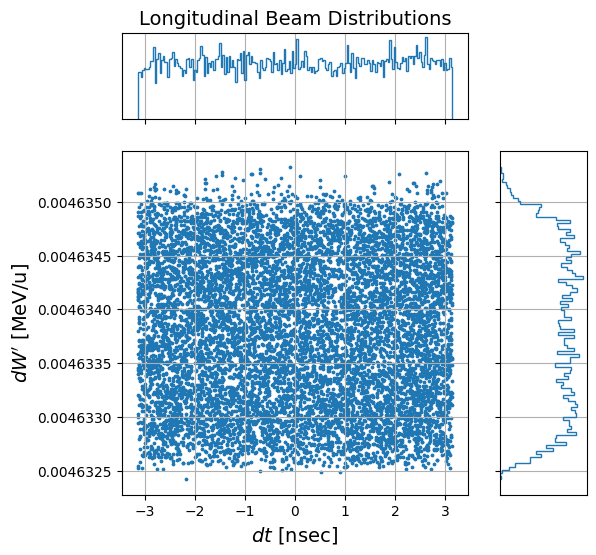

In [15]:
# Setup figure with custom GridSpec layout
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], hspace=0.15, wspace=0.15)
nbins = 200

# Horizontal phase space
ax_histx = fig.add_subplot(gs[0, 0], sharex=None)
ax_histy = fig.add_subplot(gs[1, 1], sharey=None)
ax_main_x = fig.add_subplot(gs[1, 0], sharex=ax_histx, sharey=ax_histy)

# -- Horizontal main scatter
xmin, xmax = -20, 20
ymin, ymax = -10e-6, 10e-6

ax_main_x.scatter(dt2, dW2, s=3, label='initial')
ax_main_x.set_xlabel(r'$dt$ [nsec]', fontsize=14)
ax_main_x.set_ylabel(r"$dW'$ [MeV/u]", fontsize=14)
#ax_main_x.set_xlim([xmin, xmax])
#ax_main_x.set_ylim([ymin, ymax])
ax_main_x.grid(True)

# Horizontal top projection
ax_histx.set_title('Longitudinal Beam Distributions', fontsize=14)
ax_histx.hist(dt2, bins=nbins, histtype='step')
ax_histx.grid(True)
ax_histx.set_yticks([])
ax_histx.tick_params(labelbottom=False)  # hide tick labels only, keep ticks

# Horizontal right projection
ax_histy.hist(dW2, bins=100, orientation='horizontal', histtype='step')
ax_histy.grid(True)
ax_histy.set_xticks([])
#ax_histy.set_ylim(ax_main_x.get_ylim())
ax_histy.tick_params(labelleft=False)  # show y-axis labels

#fig.savefig('img/initial_beam_distributions.png', dpi=fig.dpi)
plt.show()